# 1. Import des Bibliothèques

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Chargement des Données

In [48]:

url = "https://raw.githubusercontent.com/Zakariaed/machine_learning/main/linear_regression/california_house_price/housing.csv"

In [49]:
df = pd.read_csv(url)

print(" Dataset chargé!")
print(f" Taille: {df.shape[0]} lignes, {df.shape[1]} colonnes")

 Dataset chargé!
 Taille: 20640 lignes, 10 colonnes


## 3. Data analysis

In [50]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


![My Image](https://tse4.mm.bing.net/th/id/OIP.vs5X6RdJj9-yVOZ_9yyxfAHaIn?cb=ucfimg2&ucfimg=1&rs=1&pid=ImgDetMain&o=7&rm=3)


In [52]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [53]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


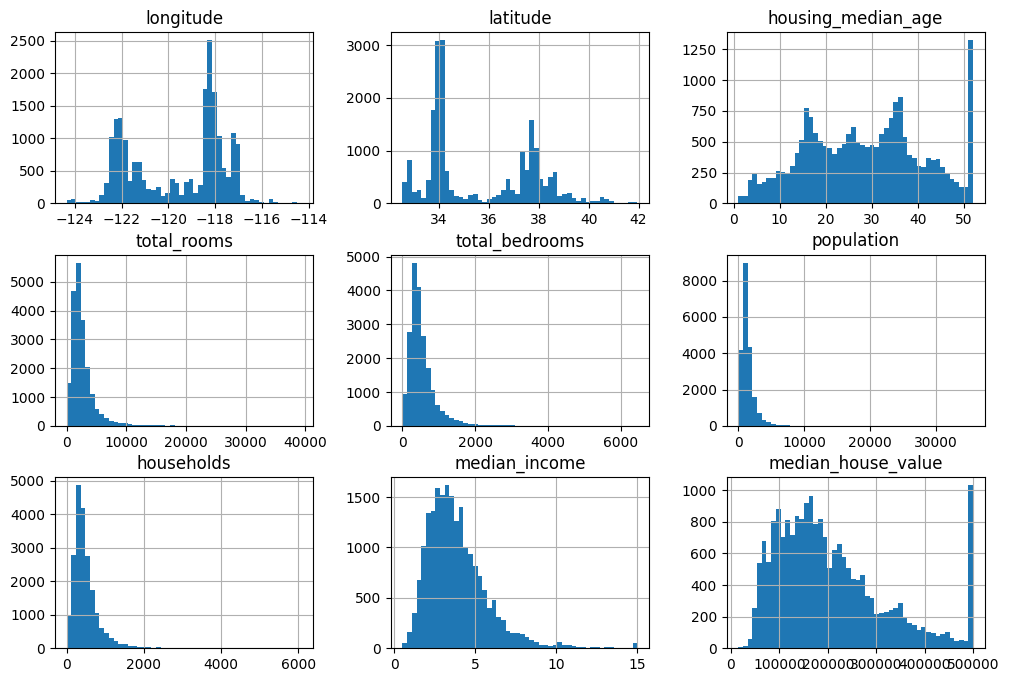

In [26]:
df.hist(bins= 50, figsize=(12,8))
plt.show()

## 4. Feature engineering

In [54]:
print("=== VALEURS MANQUANTES PAR COLONNE ===")
missing = df.isnull().sum()
missing[missing > 0]

=== VALEURS MANQUANTES PAR COLONNE ===


,0
total_bedrooms,207


! We notice appearence of missed values:


*   Option 1 : Suppression
*   Option 2 : Remplissage avec la Médiane    
*   Option 3 : Remplissage avec la Moyenne



### 4.1 Supression

 Supprimer les lignes avec des valeurs manquantes

In [36]:
df_clean1 = df.dropna()
print(f"Taille originale: {len(df)}")
print(f"Après suppression: {len(df_clean1)}")
print(f"Lignes perdues: {len(df) - len(df_clean1)}")

Taille originale: 20640
Après suppression: 20433
Lignes perdues: 207


### 4.2  Remplissage avec la Médiane (median)

In [37]:
df_clean2 = df.copy()
median_value = df['total_bedrooms'].median()
df_clean2['total_bedrooms'].fillna(median_value, inplace=True)
print(f"Médiane utilisée: {median_value}")
print(f"Valeurs manquantes après: {df_clean2['total_bedrooms'].isnull().sum()}")

Médiane utilisée: 435.0
Valeurs manquantes après: 0


/tmp/ipython-input-2600895052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean2['total_bedrooms'].fillna(median_value, inplace=True)


### 4.3  Remplissage avec la Moyenne (mean)

In [55]:
df_clean3 = df.copy()
mean_value = df['total_bedrooms'].mean()
df_clean3['total_bedrooms'].fillna(mean_value, inplace=True)
print(f"Moyenne utilisée: {mean_value}")
print(f"Valeurs manquantes après: {df_clean3['total_bedrooms'].isnull().sum()}")

Moyenne utilisée: 537.8705525375618
Valeurs manquantes après: 0


/tmp/ipython-input-2037247302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean3['total_bedrooms'].fillna(mean_value, inplace=True)


In [34]:
print("=== VALEURS MANQUANTES PAR COLONNE ===")
missing = df_clean3.isnull().sum()
missing[missing > 0]

=== VALEURS MANQUANTES PAR COLONNE ===


,0


In [35]:
print(f" Taille: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f" Taille: {df_clean3.shape[0]} lignes, {df_clean3.shape[1]} colonnes")

 Taille: 20640 lignes, 10 colonnes
 Taille: 20640 lignes, 10 colonnes


## 5. Feature selection

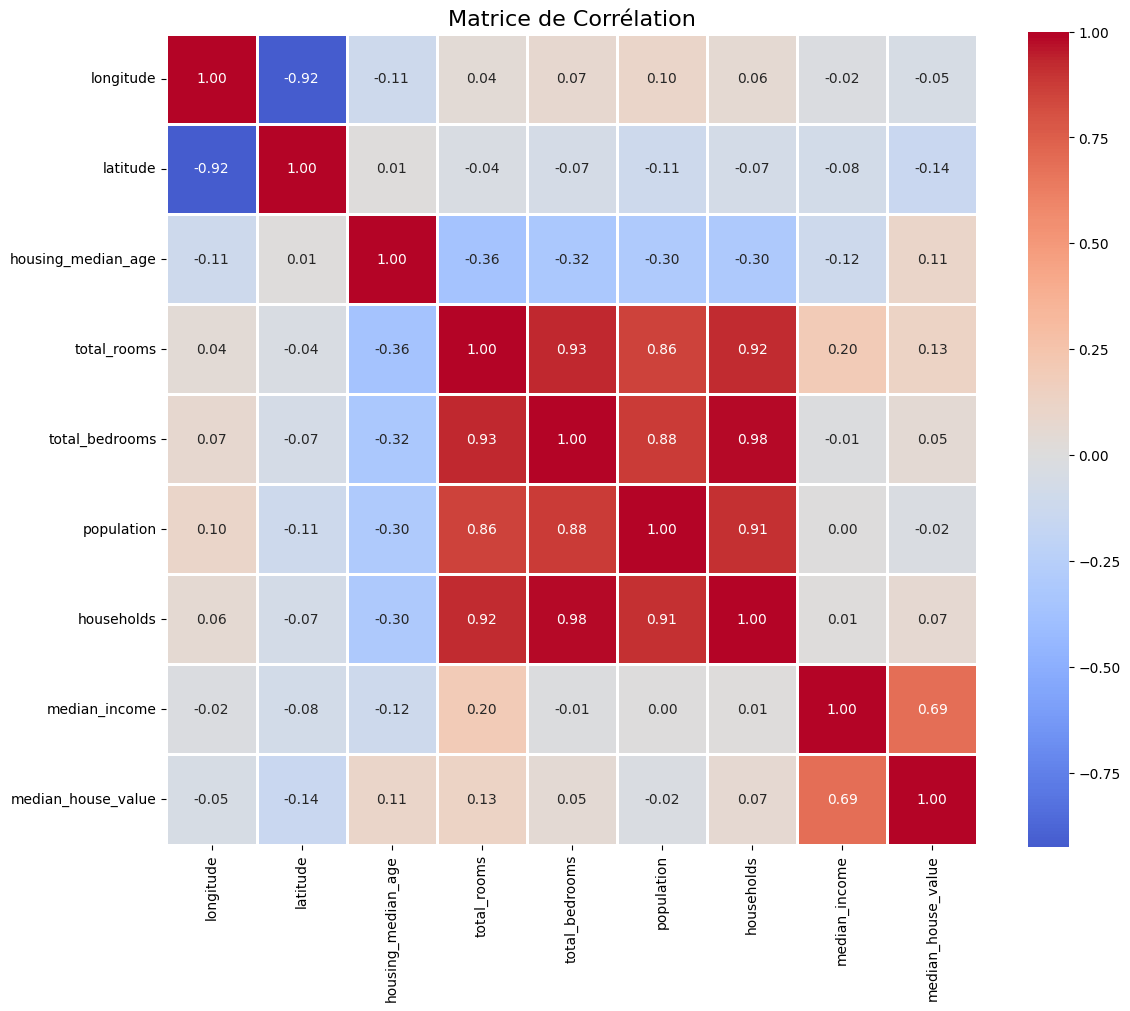

In [56]:
correlation_matrix = df.select_dtypes(include='number').corr()

# Visualiser avec une heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=1)
plt.title('Matrice de Corrélation', fontsize=16)
plt.tight_layout()
plt.show()

In [57]:

target_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("=== CORRÉLATIONS AVEC LE PRIX DES MAISONS ===")
print(target_corr)


=== CORRÉLATIONS AVEC LE PRIX DES MAISONS ===
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


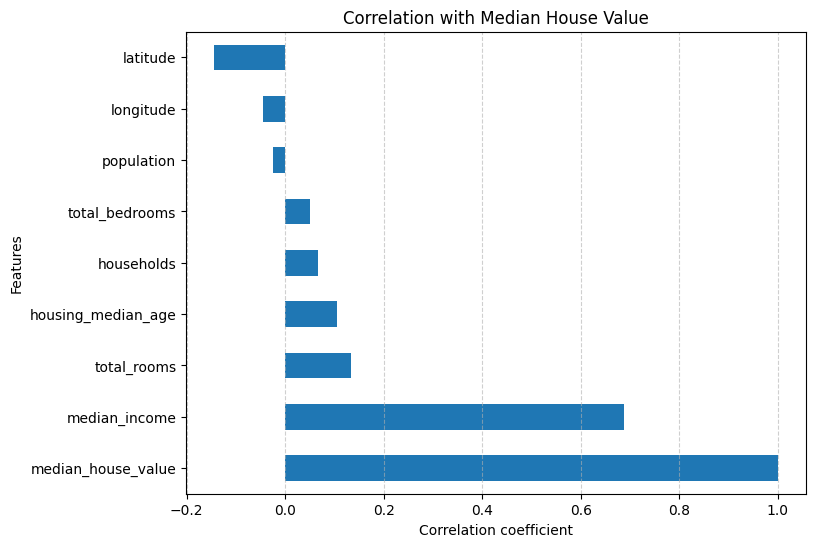

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
target_corr.plot(kind='barh')
plt.title("Correlation with Median House Value")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


! we notice that population, total_bedrooms, households are less correlate
So the idea is to create new features where we can add novel informative columns

============= Optional ======================

In [43]:

# Créer de nouvelles features
df_clean3['rooms_per_household'] = df_clean3['total_rooms'] / df_clean3['households']
df_clean3['bedrooms_per_room'] = df_clean3['total_bedrooms'] / df_clean3['total_rooms']
df_clean3['population_per_household'] = df_clean3['population'] / df_clean3['households']

In [45]:

new_features = ['rooms_per_household', 'bedrooms_per_room',
'population_per_household', 'median_house_value']
new_corr = df_clean3[new_features].corr()['median_house_value'].sort_values(ascending=False)
print("\n=== CORRÉLATIONS DES NOUVELLES FEATURES ===")
print(new_corr)


=== CORRÉLATIONS DES NOUVELLES FEATURES ===
median_house_value          1.000000
rooms_per_household         0.151948
population_per_household   -0.023737
bedrooms_per_room          -0.220049
Name: median_house_value, dtype: float64


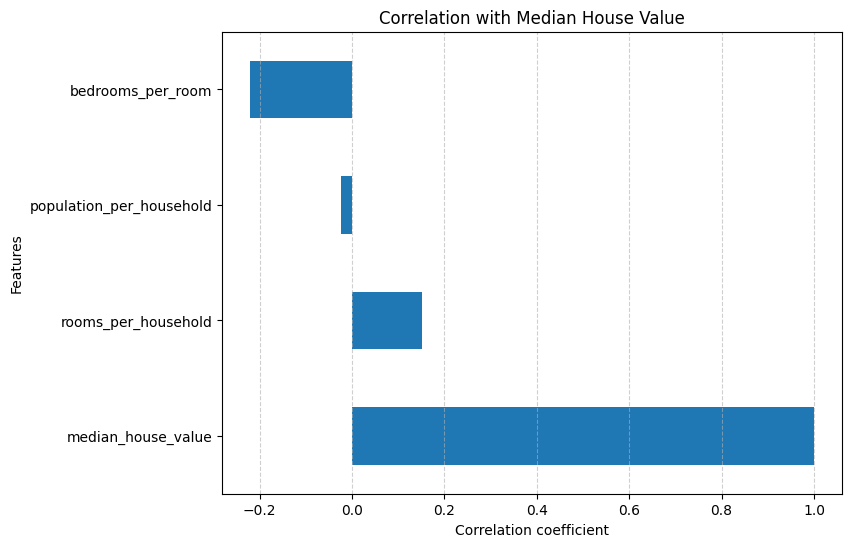

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
new_corr.plot(kind='barh')
plt.title("Correlation with Median House Value")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [60]:
df_clean3 = pd.get_dummies(df_clean3, columns=[df_clean1.columns[-1]])

In [61]:
df_clean3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [62]:
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

## 6. Model build

In [63]:
X = df_clean3.drop('median_house_value', axis=1)  # all features
y = df_clean3['median_house_value']                # target

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [71]:
y_pred.shape

(4128,)

In [72]:
X_test.shape

(4128, 13)

In [74]:
X_test.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,False,True,False,False,False
3024,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313,False,True,False,False,False
15663,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801,False,False,False,True,False
20484,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376,True,False,False,False,False
9814,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250,False,False,False,False,True


In [76]:
y_pred[:5]

array([ 64629.45079786, 134799.34083607, 266063.38139054, 278576.43346807,
       273343.43671457])

## 7. Conclusion

In [66]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 50701.77903132984


In [67]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 4904399775.949281


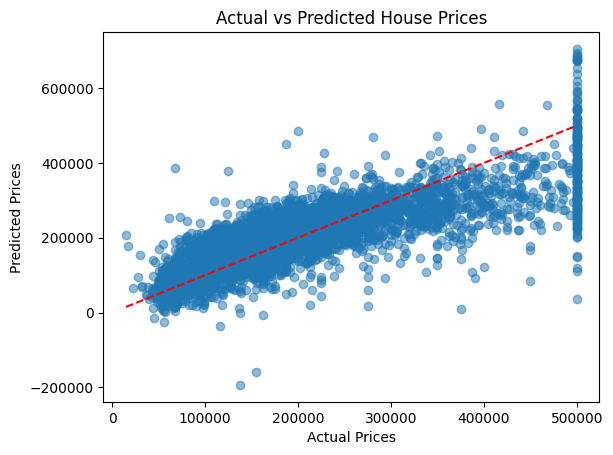

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


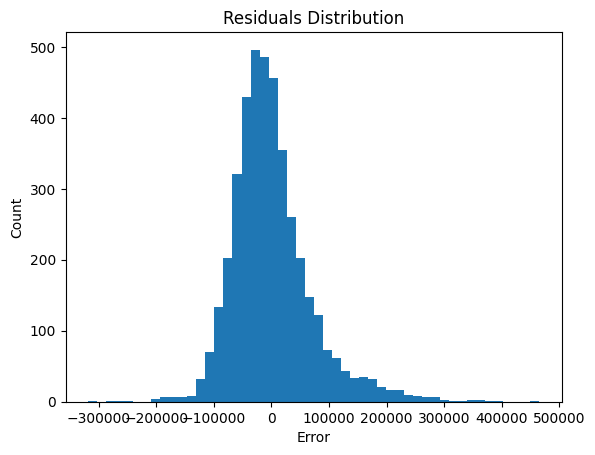

In [70]:
residuals = y_test - y_pred

plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()


## 8. Deploiment

### Save the model

In [ ]:
import joblib

joblib.dump(model, "linear_regression_model.pkl")
# Later you can load it:
# model = joblib.load("linear_regression_model.pkl")


### Load the model

In [ ]:
import joblib

# Load the saved model
model = joblib.load("linear_regression_model.pkl")


### Model test

In [ ]:
# Make predictions
y_pred_new = model.predict(X_new)

print(y_pred_new)
